# 1

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("Saudi Arabia -Covid-19 dataset.xlsx")

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,SAU,Asia,Saudi Arabia,2020-03-02,1,1,NaN,NaN,NaN,NaN,...,1.8,25.4,NaN,2.7,75.13,0.854,NaN,NaN,NaN,NaN
1,SAU,Asia,Saudi Arabia,2020-03-03,1,0,NaN,NaN,NaN,NaN,...,1.8,25.4,NaN,2.7,75.13,0.854,NaN,NaN,NaN,NaN
2,SAU,Asia,Saudi Arabia,2020-03-04,1,0,NaN,NaN,NaN,NaN,...,1.8,25.4,NaN,2.7,75.13,0.854,NaN,NaN,NaN,NaN
3,SAU,Asia,Saudi Arabia,2020-03-05,5,4,NaN,NaN,NaN,NaN,...,1.8,25.4,NaN,2.7,75.13,0.854,NaN,NaN,NaN,NaN
4,SAU,Asia,Saudi Arabia,2020-03-06,5,0,NaN,NaN,NaN,NaN,...,1.8,25.4,NaN,2.7,75.13,0.854,NaN,NaN,NaN,NaN


In [2]:
new = df[['new_tests' , 'new_cases']]
new.head()

,new_tests,new_cases
0,160.0,1
1,240.0,0
2,298.0,0
3,487.0,4
4,1024.0,0


In [3]:
# Dropping rows with null values
new.dropna(inplace=True , axis=0)
new['new_tests'].isnull().sum()

D:\Users\rude_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

# 2

In [4]:
Z = np.array( new['new_tests'] ) #input
F = np.array( new['new_cases'] ) #output

print(Z[:5] , F[:5])

[ 160.  240.  298.  487. 1024.] [1 0 0 4 0]


# 3 

In [5]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(Z , F , test_size=0.3 , random_state = 4)

print(X_train[:5])  
print(y_train[:5])

[42125. 57483.  8219. 47129.  8256.]
[ 249 1258  472  390  518]


# 4 

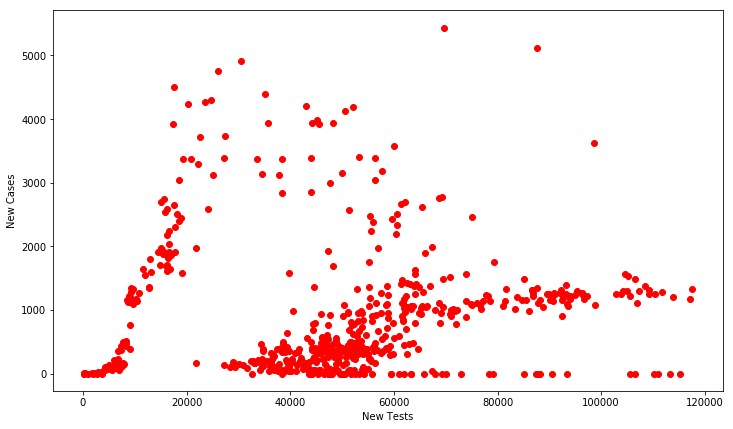

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.scatter(Z , F , c='r')
plt.xlabel('New Tests')
plt.ylabel('New Cases')

plt.show()

# 5

In [8]:
# Adding x0=1 to each instance
rows = len(new['new_tests'])
X_b=np.array([np.ones(rows),Z]).T

# Using Normal Equation.
theta_best_values=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(F)

intercept = theta_best_values[0]
slope = theta_best_values[1]
# Display best values obtained.
print('Intercept : ' , intercept)
print('Slope : ' , slope)


Intercept :  823.2168753744907
Slope :  0.0014726834540887165


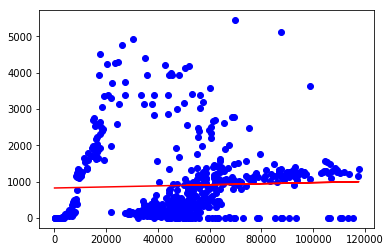

In [9]:
plt.scatter(Z , F , color='blue')
plt.plot(Z , slope*Z + intercept , color='red')
plt.show()

In [10]:
def predict_val(x):
    x_b = np.array([np.ones(len(x)),x]).T
    
    pred = x_b.dot(theta_best_values)
    return pred


predicted_value = predict_val(X_train)

print('Predicted:')
print(predicted_value[:5])

Predicted:
[885.25366588 907.87113837 835.32086068 892.62297388 835.37534997]


# 6

In [11]:
from sklearn.preprocessing import StandardScaler

sk = StandardScaler()
new_scaled = sk.fit_transform(new)
new_scaled = pd.DataFrame(new_scaled, columns =['new_tests', 'new_cases'])

new_scaled.head()

,new_tests,new_cases
0,-1.972192,-0.889817
1,-1.969018,-0.890810
2,-1.966717,-0.890810
3,-1.959220,-0.886837
4,-1.937917,-0.890810


In [12]:
#Z_scaled = np.array(new_scaled['new_tests'])
Z_scaled = new_scaled[['new_tests']]
Z_scaled['intercept'] = 1

Z_scaled = np.array(Z_scaled)
F_scaled = np.array(new_scaled['new_cases'])

# Adding x0=1 to each instance
rows = len(new_scaled['new_tests'])
#X_b=np.array([np.ones(rows),Z_scaled])

theta = ([0,0])


In [13]:
def gradient_desc(X , y , alpha , theta , iterations):
    for it in range(iterations):
        hyp = X.dot(theta)
        loss = hyp - y
        gradient = X.T.dot(loss)/rows
        theta = theta - alpha*gradient        
    
    return theta

alpha = 0.01    #learning rate
theta_best = gradient_desc(Z_scaled , F_scaled , alpha , theta , 1000)

intercept = theta_best[0]
slope = theta_best[1]

print('Learned Theta = ' , theta_best)

Learned Theta =  [3.68792017e-02 5.01341887e-17]


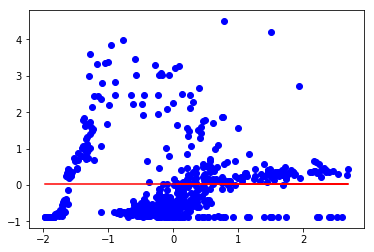

In [14]:
zz = np.array(new_scaled['new_tests'])

plt.scatter(zz , F_scaled , color='blue')
plt.plot(zz , slope*zz + intercept , color='red')
plt.show()

# 7

In [24]:
# LEARNING RATE = 0.02

alpha = 0.02    #learning rate
theta_best = gradient_desc(Z_scaled , F_scaled , alpha , theta , 1000)

intercept = theta_best[0]
slope = theta_best[1]

print('Learned Theta = ' , theta_best)

Learned Theta =  [3.68807938e-02 4.91981183e-17]


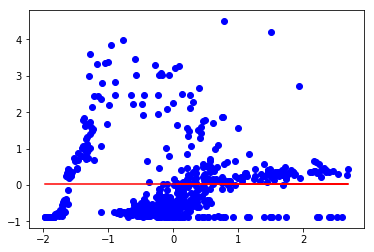

In [16]:
plt.scatter(zz , F_scaled , color='blue')
plt.plot(zz , slope*zz + intercept , color='red')
plt.show()

In [37]:
# LEARNING RATE = 0.5

alpha = 0.5    #learning rate
theta_best = gradient_desc(Z_scaled , F_scaled , alpha , theta , 1000)

intercept = theta_best[0]
slope = theta_best[1]

print('Learned Theta = ' , theta_best)

Learned Theta =  [3.68807939e-02 1.39684923e-16]


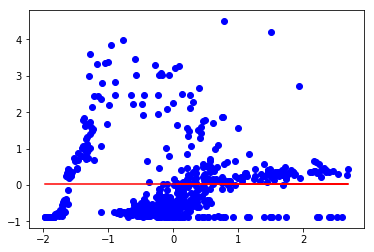

In [38]:
plt.scatter(zz , F_scaled , color='blue')
plt.plot(zz , slope*zz + intercept , color='red')
plt.show()

In [52]:
'''
Intercept remains same for both learning rates while slope changes.
Overall little to no effect is observed in the regression line in the plot.
(although might miss global minima in 2nd because of lr being too high)
takes little more time for smaller learning rate
'''

'\nIntercept remains same for both learning rates while slope changes.\nOverall little to no effect is observed in the regression line in the plot.\n(although might miss global minima in 2nd because of lr being too high)\ntakes little more time for smaller learning rate\n'

# 8

In [60]:
# LEARNING RATE = 0.1
# ITERATIONS = 10

alpha = 0.1    #learning rate
theta_best = gradient_desc(Z_scaled , F_scaled , alpha , theta , 10)

intercept = theta_best[0]
slope = theta_best[1]

print('Learned Theta = ' , theta_best )

Learned Theta =  [2.40212562e-02 4.70937741e-17]


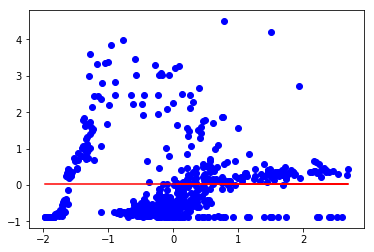

In [61]:
plt.scatter(zz , F_scaled , color='blue')
plt.plot(zz , slope*zz + intercept , color='red')
plt.show()

In [62]:
# LEARNING RATE = 0.1
# ITERATIONS = 50

alpha = 0.1    #learning rate
theta_best = gradient_desc(Z_scaled , F_scaled , alpha , theta , 50)

intercept = theta_best[0]
slope = theta_best[1]

print('Learned Theta = ' , theta_best)

Learned Theta =  [3.66907186e-02 8.02553376e-17]


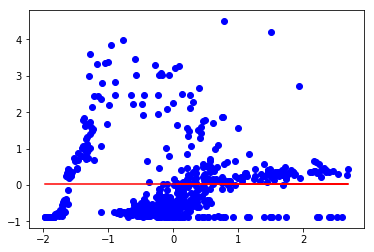

In [63]:
plt.scatter(zz , F_scaled , color='blue')
plt.plot(zz , slope*zz + intercept , color='red')
plt.show()

In [64]:
# LEARNING RATE = 0.1
# ITERATIONS = 100

alpha = 0.1    #learning rate
theta_best = gradient_desc(Z_scaled , F_scaled , alpha , theta , 100)

intercept = theta_best[0]
slope = theta_best[1]

print('Learned Theta = ' , theta_best)

Learned Theta =  [3.68798143e-02 2.58326403e-17]


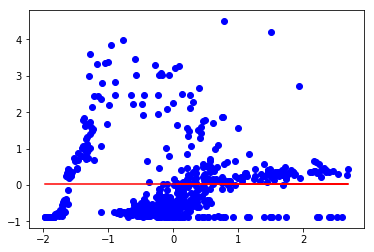

In [65]:
plt.scatter(zz , F_scaled , color='blue')
plt.plot(zz , slope*zz + intercept , color='red')
plt.show()

In [51]:
'''
Intercept doesn't change much after 50 iteration but there is major difference in slope for selecting differnt 
number of iterations.
'''

"\nIntercept doesn't change much after 50 iteration but there is major difference in slope for selecting differnt number of iterations.\n"

# 9


In [66]:
from sklearn.linear_model import SGDRegressor

Z_scaled = new_scaled[['new_tests']]
Z_scaled['intercept'] = 1

Z_scaled = np.array(Z_scaled)
F_scaled = np.array(new_scaled['new_cases'])

sgd = SGDRegressor(max_iter=50 , eta0=0.01 , random_state = 42)

sgd.fit(Z_scaled , F_scaled)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [67]:
print('Learned Theta = ' , sgd.coef_) # ( slope , intercept)

Learned Theta =  [0.02774915 0.01023551]


# 10  and 11

In [68]:
# HELP TAKEN FROM -->  https://prutor.ai/mini-batch-gradient-descent-with-python/

#           FOR MINI BATCH SIZE = 20

rows = len(Z_scaled)

def iterate_minibatches(chunksize):
    # Provide chunks one by one
    start = 0
    while start+chunksize < rows:
        chunkrows = range(start , start+chunksize)
        X_ch = Z_scaled[chunkrows] 
        y_ch = F_scaled[chunkrows]        
        yield X_ch , y_ch
        start += chunksize
 
batch_iterator = iterate_minibatches(20)
model = SGDRegressor()

# Train model
for X_ch, y_ch in batch_iterator:
    model.partial_fit(X_ch, y_ch)
    
print('Learned Theta = ' , model.coef_) # ( slope , intercept)

Learned Theta =  [-0.01420909 -0.07403453]


In [69]:
#           FOR MINI BATCH SIZE = 120

rows = len(Z_scaled)

def iterate_minibatches(chunksize):
    # Provide chunks one by one
    start = 0
    while start+chunksize < rows:
        chunkrows = range(start , start+chunksize)
        X_ch = Z_scaled[chunkrows] 
        y_ch = F_scaled[chunkrows]        
        yield X_ch , y_ch
        start += chunksize
 
batch_iterator = iterate_minibatches(120)
model = SGDRegressor()

# Train model
for X_ch, y_ch in batch_iterator:
    model.partial_fit(X_ch, y_ch)
    
print('Learned Theta = ' , model.coef_) # ( slope , intercept)

Learned Theta =  [ 0.11429719 -0.10445492]


In [70]:
#           FOR MINI BATCH SIZE = 66

rows = len(Z_scaled)

def iterate_minibatches(chunksize):
    # Provide chunks one by one
    start = 0
    while start+chunksize < rows:
        chunkrows = range(start , start+chunksize)
        X_ch = Z_scaled[chunkrows] 
        y_ch = F_scaled[chunkrows]        
        yield X_ch , y_ch
        start += chunksize
 
batch_iterator = iterate_minibatches(66)
model = SGDRegressor()

# Train model
for X_ch, y_ch in batch_iterator:
    model.partial_fit(X_ch, y_ch)
    
print('Learned Theta = ' , model.coef_) # ( slope , intercept)

Learned Theta =  [ 0.02434668 -0.07171362]


# 12

In [71]:
from sklearn.linear_model import LinearRegression

multi = df[['new_tests' , 'new_cases_per_million' , 'new_deaths_per_million' , 'new_tests_per_thousand' , 'tests_per_case' , 'new_cases']]

multi.dropna(inplace=True , axis=0)

X = multi.drop('new_cases' , axis=1)
y = multi[['new_cases']]

D:\Users\rude_\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [72]:
lr = LinearRegression()

lr.fit(X , y)

print('Learned Theta = ' , lr.coef_) # ( slope , intercept)

Learned Theta =  [[-1.20830391e-05  3.53406488e+01  2.53635210e-03  4.27606324e-01
   4.75936534e-07]]


#  13

In [73]:
# QUADRATIC POLYNOMIAL

from sklearn.preprocessing import PolynomialFeatures

pol_feat = PolynomialFeatures(degree = 4)
X_poly = pol_feat.fit_transform(X)

pol_lr = LinearRegression()

pol_lr.fit(X_poly , y)

print('Learned Theta = ' , pol_lr.coef_) # ( slope , intercept)

Learned Theta =  [[ 1.68445415e-03  5.87011103e-05  5.28997261e-07 -5.39713622e-08
  -9.68949055e-09  1.97183172e-07 -8.12316526e-07  2.94427972e-03
   2.81080917e-05 -4.71678877e-08 -2.57798267e-06  2.72595055e-05
   2.55190911e-07  8.31817336e-08  6.56656570e-08  1.70957555e-09
  -2.50953145e-09 -1.61695660e-08 -2.75700413e-12 -4.20025631e-10
   1.64792359e-06  4.01594437e-10 -7.12817664e-08  1.12520225e-06
  -1.35465572e-05  1.34344569e-09  5.81473151e-06 -8.54372913e-04
   5.06455827e-07 -1.81633368e-06 -1.16202314e-05 -4.98516370e-09
  -2.99171313e-05 -7.50469525e-10 -4.98074207e-06 -5.08635768e-08
   1.74545644e-03  1.36194802e-05  2.57395042e-09 -3.66327653e-07
   1.24506221e-07 -2.41333162e-08  1.02911560e-06  2.87270582e-11
  -2.83196921e-09 -5.77660724e-06  2.41698533e-09 -3.28501681e-10
   2.61050046e-08 -2.82213699e-13 -1.00134609e-09 -2.61772597e-05
  -3.11670718e-14 -2.81878869e-10 -1.68428487e-07  9.31112617e-07
  -2.38124001e-15 -6.57709638e-12 -4.64616539e-10  5.321794

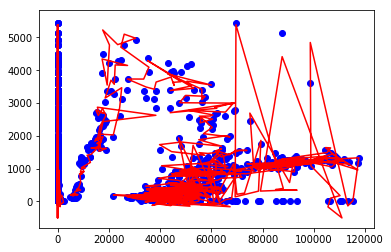

In [74]:
y_pred = pol_lr.predict(X_poly)

# X_plot = np.arange(0,len(X),1)
# plt.scatter(X_plot , y , color='blue')
plt.scatter(X.iloc[:,0].values , y , color='blue')
plt.scatter(X.iloc[:,1].values , y , color='blue')
plt.scatter(X.iloc[:,2].values , y , color='blue')
plt.scatter(X.iloc[:,3].values , y , color='blue')
plt.scatter(X.iloc[:,4].values , y , color='blue')

plt.plot(X , y_pred , color='red') 

plt.show()

# 14

In [75]:
# 2d POLYNOMIAL

from sklearn.preprocessing import PolynomialFeatures

pol_feat = PolynomialFeatures(degree = 2)
X_poly = pol_feat.fit_transform(X)

pol_lr = LinearRegression()

pol_lr.fit(X_poly , y)

print('Learned Theta = ' , pol_lr.coef_) # ( slope , intercept)

Learned Theta =  [[ 0.00000000e+00  9.98257544e-05  3.53405366e+01  1.59297646e-02
  -3.52841770e+00 -3.04867383e-06 -2.24562871e-09 -2.20981991e-06
   8.54541757e-05  7.93766134e-05  1.19022453e-07 -1.55745182e-07
   8.81049935e-05  7.81365225e-02  6.89805503e-07 -6.91327431e-03
  -3.02497853e+00 -1.78755600e-05 -3.74431871e-04 -4.20102179e-03
  -2.66262114e-09]]


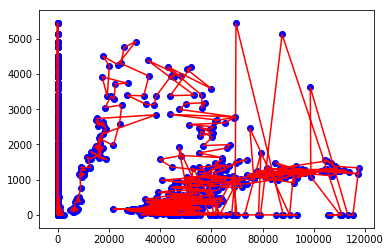

In [76]:
y_pred = pol_lr.predict(X_poly)

# X_plot = np.arange(0,len(X),1)
# plt.scatter(X_plot , y , color='blue')
plt.scatter(X.iloc[:,0].values , y , color='blue')
plt.scatter(X.iloc[:,1].values , y , color='blue')
plt.scatter(X.iloc[:,2].values , y , color='blue')
plt.scatter(X.iloc[:,3].values , y , color='blue')
plt.scatter(X.iloc[:,4].values , y , color='blue')

plt.plot(X , y_pred , color='red') 

plt.show()

#  15

In [77]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state = 4)

lr = LinearRegression()

lr.fit(X_train , y_train)

print('Learned Theta = ' , lr.coef_) # ( slope , intercept)

Learned Theta =  [[ 3.29937762e-05  3.53406537e+01  3.41840240e-03 -1.16575216e+00
   2.02250699e-06]]


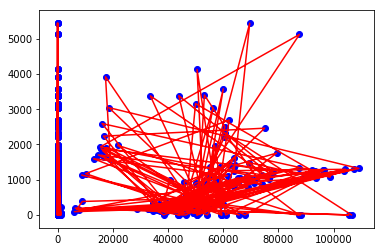

In [78]:
# Plotting while testing on test data (predicting)

y_pred = lr.predict(X_test)

plt.scatter(X_test.iloc[:,0].values , y_test , color='blue')
plt.scatter(X_test.iloc[:,1].values , y_test , color='blue')
plt.scatter(X_test.iloc[:,2].values , y_test , color='blue')
plt.scatter(X_test.iloc[:,3].values , y_test , color='blue')
plt.scatter(X_test.iloc[:,4].values , y_test , color='blue')

plt.plot(X_test , y_pred , color='red') 

plt.show()